# 02 Exploratory Data Analysis

In [1]:
import os

os.chdir("..")
#print("Current working dir:", os.getcwd())
#print("Files in raw folder:", os.listdir("data/raw"))

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

## a. Import Data

In [3]:
cleaned_df = pd.read_csv("data/interim/cleaned_data.csv")

In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                63 non-null     object 
 1   id_number                63 non-null     object 
 2   age_range                63 non-null     object 
 3   gender                   63 non-null     object 
 4   country                  63 non-null     object 
 5   referral_source          63 non-null     object 
 6   years_experience         63 non-null     object 
 7   track_applied            63 non-null     object 
 8   weekly_commitment_hours  63 non-null     object 
 9   main_aim                 63 non-null     object 
 10  motivation               63 non-null     object 
 11  skill_level              63 non-null     object 
 12  aptitude_test_completed  63 non-null     object 
 13  total_score              63 non-null     float64
 14  graduated                63 

### Convert  age_range, years_experience, weekly_commitment_hours, and skill_level to categorical data

In [5]:
#Keeep the years_experience ordered and categorical for visualization

experience_categories = [
    "Less than six months",
    "6 months - 1 year",
    "1-3 years",
    "4-6 years"
]

cleaned_df["years_experience"] = pd.Categorical(
    cleaned_df["years_experience"], 
    categories=experience_categories, 
    ordered=True
)

In [6]:
#ordered categories for weekly_commitment_hours column

commitment_categories = ["less than 6 hours", "7-14 hours", "more than 14 hours"]

cleaned_df["weekly_commitment_hours"] = pd.Categorical(
    cleaned_df["weekly_commitment_hours"], 
    categories=commitment_categories, 
    ordered=True
)

In [7]:
#ordered categories for skill_level column

skill_level_categories = ["Beginner", "Elementary", "Intermediate"]

cleaned_df["skill_level"] = pd.Categorical(
    cleaned_df["skill_level"].replace({
        "Beginner - I have NO learning or work experience in data analysis/ data science": "Beginner",
        "Elementary - I have theoretical understanding of basic data analysis/ data science concepts": "Elementary",
        "Intermediate - I have theoretical knowledge and experience in data analysis/ data science": "Intermediate"
    }),
    categories=skill_level_categories,
    ordered=True
)

In [8]:
#ordered categories for age_range column

age_categories = ["18-24 years", "25-34 years", "35-44 years", "45-54 years"]

cleaned_df["age_range"] = pd.Categorical(cleaned_df["age_range"], categories=age_categories, ordered=True)

In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   timestamp                63 non-null     object  
 1   id_number                63 non-null     object  
 2   age_range                63 non-null     category
 3   gender                   63 non-null     object  
 4   country                  63 non-null     object  
 5   referral_source          63 non-null     object  
 6   years_experience         63 non-null     category
 7   track_applied            63 non-null     object  
 8   weekly_commitment_hours  63 non-null     category
 9   main_aim                 63 non-null     object  
 10  motivation               63 non-null     object  
 11  skill_level              63 non-null     category
 12  aptitude_test_completed  63 non-null     object  
 13  total_score              63 non-null     float64 
 14  graduated   

### Using .describe() to find the summary statistics of the data

In [10]:
cleaned_df.describe(include="all")

,timestamp,id_number,age_range,gender,country,referral_source,years_experience,track_applied,weekly_commitment_hours,main_aim,motivation,skill_level,aptitude_test_completed,total_score,graduated
count,63,63,63,63,63,63,63,63,63,63,63,63,63,63.000000,63
unique,63,63,4,2,2,6,4,2,3,4,63,3,2,NaN,2
top,2024-12-01 23:50:47,DS301,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,to enter into the data analysis career,Elementary,Yes,NaN,No
freq,1,1,38,37,62,36,41,61,37,40,1,28,61,NaN,48
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.261905,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.238371,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.330000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.670000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.330000,NaN


#### Key points 

1. We have 63 unique entries.
2. We have 4 diffrent age_ranges with 18-24 being the most common group - 38.
3. Most of the participants were Male - 37.
4. All except one of the students were from Kenya.
5. The most common referral_source was WhatsApp - 36.
6. Many students had less than 6 months of experience - 41.
7. Majority of the students enrolled for the Data Science track - 61.
8. Majority of the students agreed to a weekly commitment of 7-14hrs - 37.
9. The main aim of many students was to upskill - 40.
10. Almost half of the students skill level was Elementary - 28.
11. Many students undetook the amptitude test - 63.
12. The average score of the students was 69.3.
13. Majority of the students many did not graduate - 48.

## b. Univariate Analysis

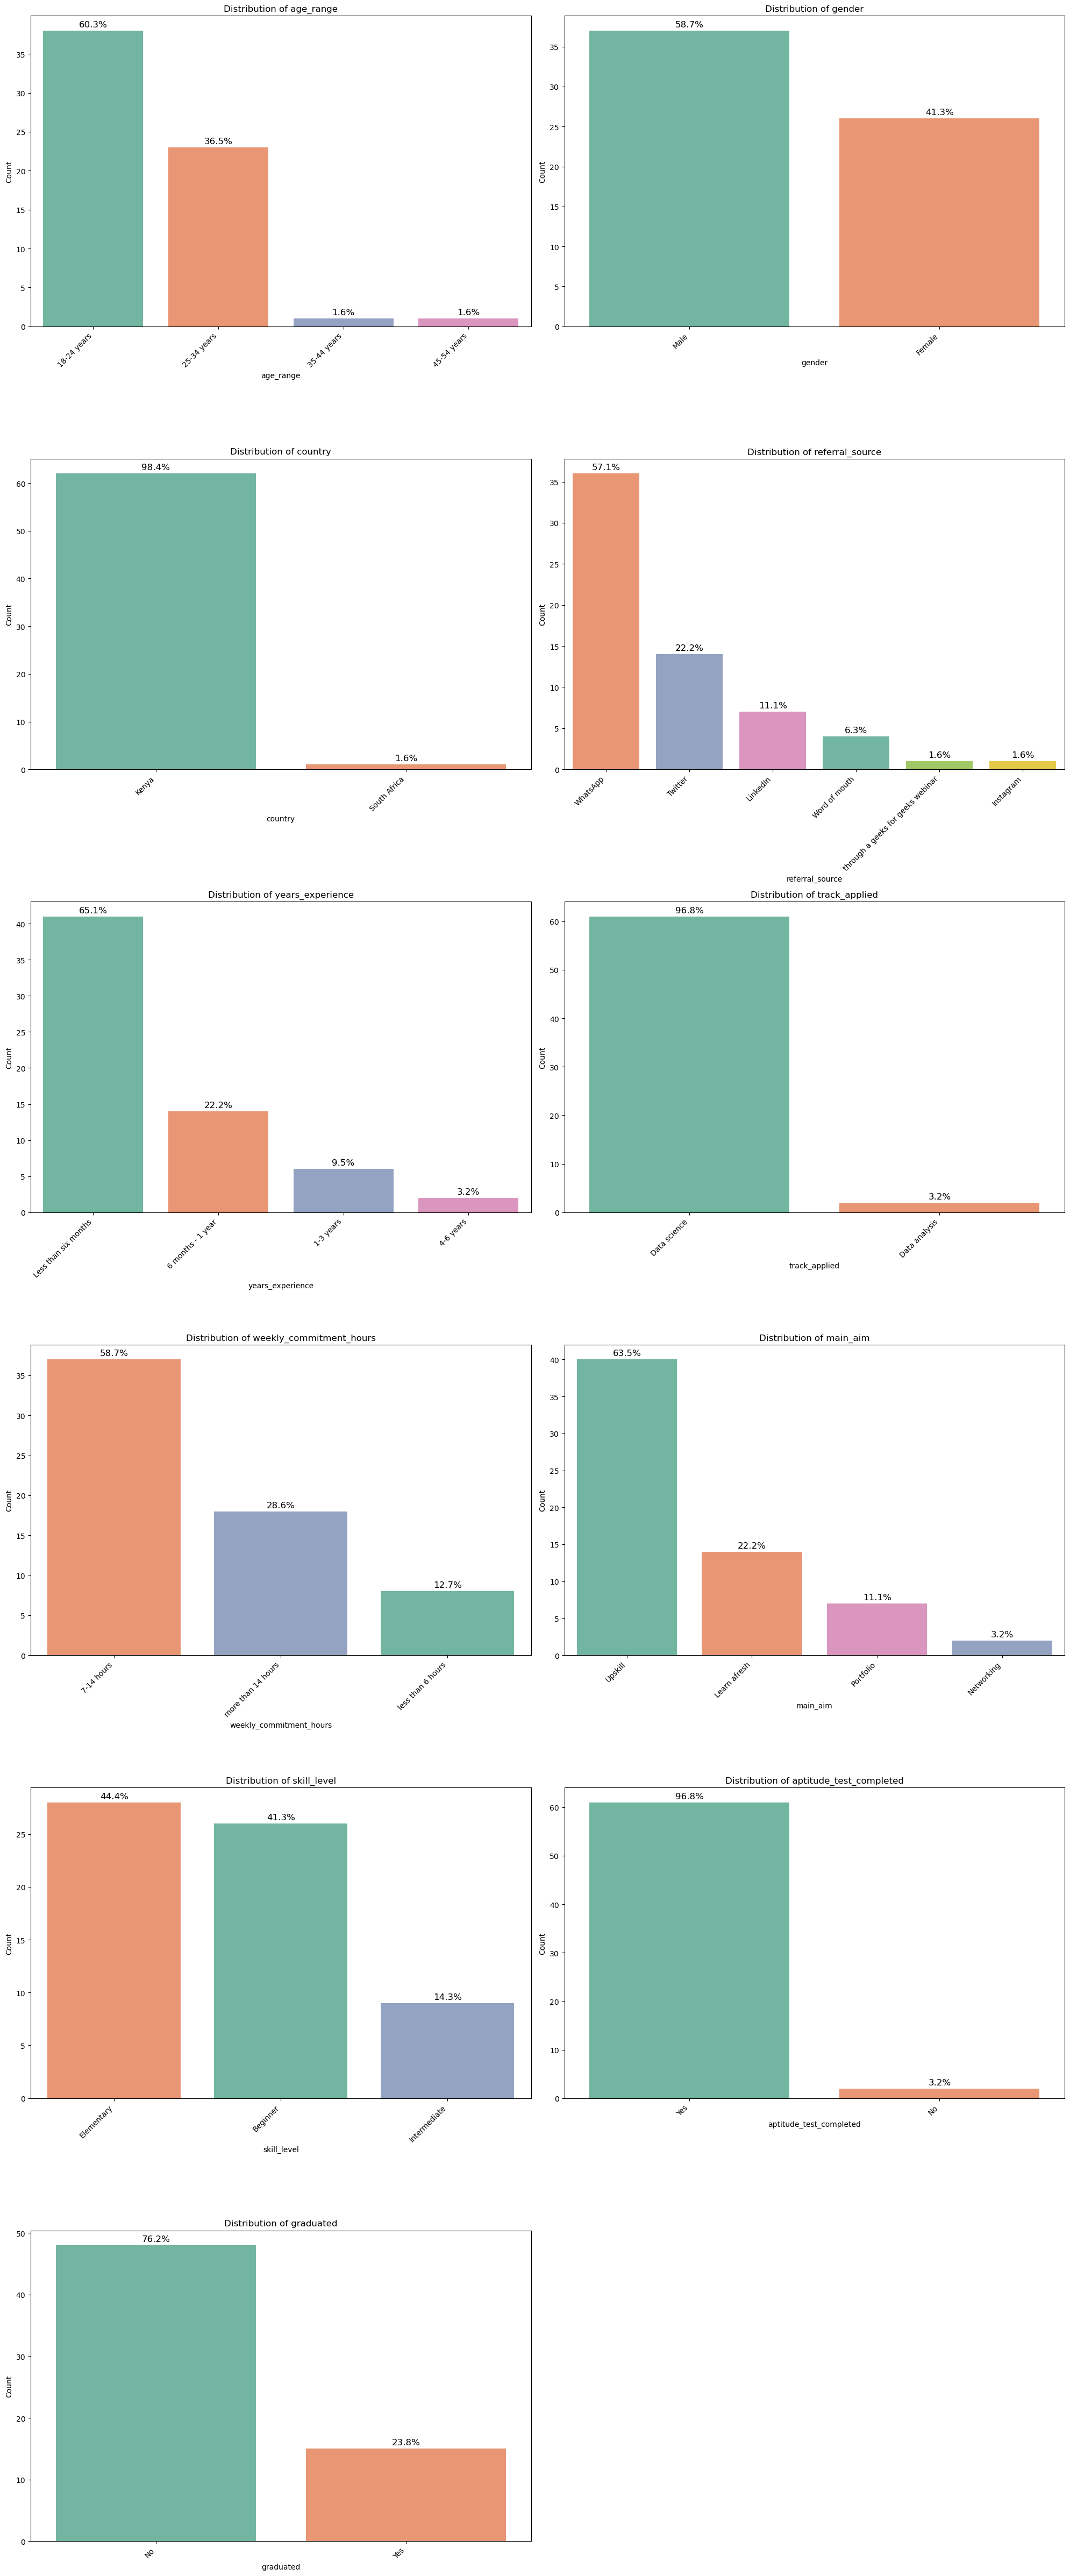

In [11]:
# Categorical columns
columns = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_remove = ['timestamp', 'id_number','motivation']

cat_cols = [col for col in columns if col not in columns_to_remove]

# Adjust grid size here 
n_cols = 2
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8*n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    total = len(cleaned_df[col])  # total number of rows
    
    # Plot counts
    sns.countplot(
        data=cleaned_df, 
        x=col, 
        order=cleaned_df[col].value_counts().index, 
        palette="Set2", 
        hue=col, 
        legend=False, 
        ax=ax
    )
    
    # Add percentages above bars
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height/total:.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 3),
                    textcoords='offset points')
    
    ax.set_title(f"Distribution of {col}")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45)
    for tick in ax.get_xticklabels():
        tick.set_ha('right')

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
cleaned_df["total_score"].describe()

count    63.000000
mean     69.261905
std       7.238371
min      58.330000
25%      64.000000
50%      67.670000
75%      74.330000
max      83.670000
Name: total_score, dtype: float64

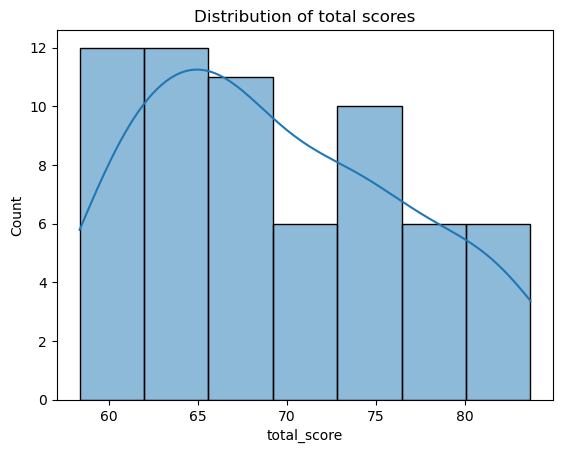

In [13]:
#Plot to check for distribution of the scores 
sns.histplot(data=cleaned_df, x="total_score", kde=True)
plt.title("Distribution of total scores")
plt.show()

#### Observations

1. Scores span from about 58 to 83.
2. The distribution looks slightly left-skewed (longer tail toward higher scores).
3. The peak (mode) is around 62–66, meaning most applicants scored in that range.
4. There’s noticeable variation; scores are spread across ~25 points.
5. No extreme outliers visible — the data looks fairly continuous.
6. Density curve (blue line) shows the probability density, it confirms that the bulk of scores cluster between 60 and 70, with fewer higher scorers above 75.

Most participants performed average to moderately well, with fewer achieving very high scores.

Since the scores cluster around the mid-60s, this could be the benchmark / central tendency for the cohort.

## c. Bivariate Analysis

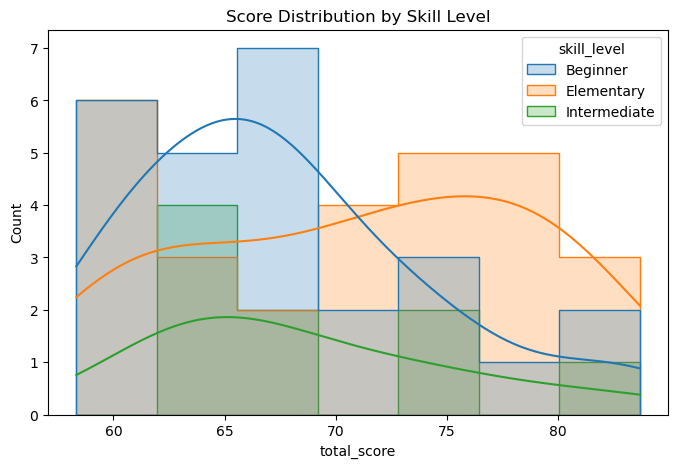

In [14]:
#Histogram / KDE split by Group
plt.figure(figsize=(8,5))
sns.histplot(data=cleaned_df, x="total_score", hue="skill_level", kde=True, element="step")
plt.title("Score Distribution by Skill Level")
plt.show()

#### Key Observations
Beginner Skill Level: The scores for this group are concentrated in the lower range, peaking around 60. The distribution appears to be skewed toward the higher end of the range.

Elementary Skill Level: This group has a wider range of scores, with the distribution centered around a higher score, roughly 68. This is the largest group, with scores reaching as high as the mid-80s.

Intermediate Skill Level: The scores for this group are concentrated in the middle of the range, peaking around 75. The distribution is less pronounced than the other two groups, suggesting more variability in performance.

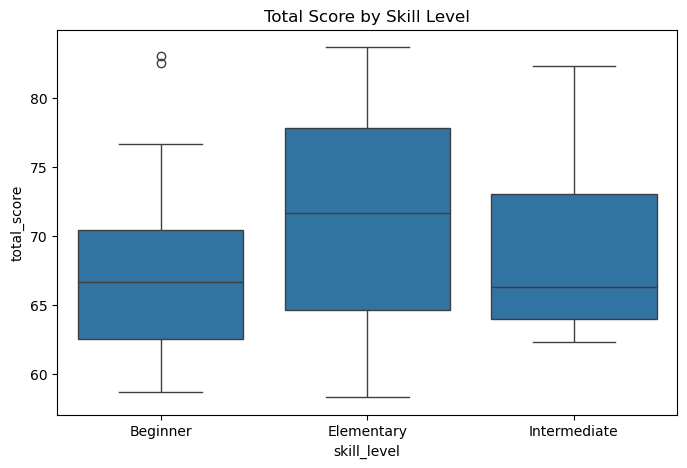

In [15]:
#Boxplot: Scores vs Skill Level
plt.figure(figsize=(8,5))
sns.boxplot(x="skill_level", y="total_score", data=cleaned_df)
plt.title("Total Score by Skill Level")
plt.show()

#### Key Observations
Beginner: The scores for this group are the lowest overall. The median score is around 67. The box itself covers the interquartile range (IQR), from approximately 62 to 70. There's also an outlier, suggesting that some student scored significantly higher than their peers.

Elementary: This group has the highest scores overall. The median score is around 72. The box is wider than the other two, indicating a greater spread of scores. The range of scores is also wider, from the low 60s to the low 80s.

Intermediate: The scores for this group are slightly lower than the Elementary level. The median score is approximately 68, and the interquartile range (IQR) is roughly from 64 to 73. The spread of scores is similar to the Beginner group, but the overall scores are slightly higher.

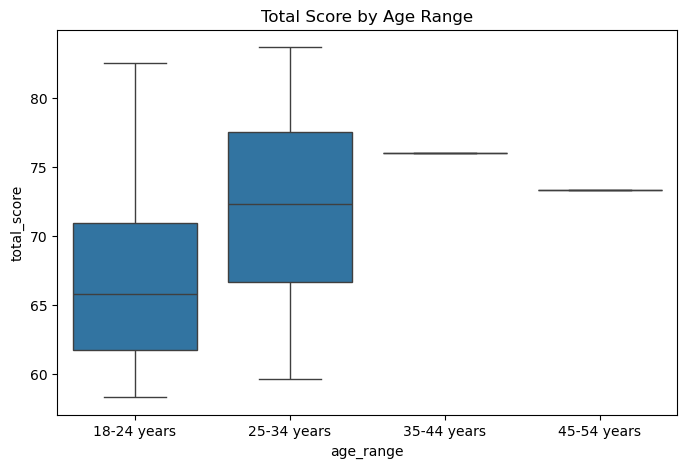

In [16]:
#Boxplot: Scores vs Age Range
plt.figure(figsize=(8,5))
sns.boxplot(x="age_range", y="total_score", data=cleaned_df)
plt.title("Total Score by Age Range")
plt.show()

#### Key Observations
18-24 years: This group has a wide range of scores. The median score is around 66. The middle 50% of scores, spans from roughly 62 to 71.

25-34 years: This group has the highest scores and the largest spread of data. The median score is higher than all other groups, at approximately 72. The IQR is also broad, from around 67 to 77.

35-44 years: The scores for this age group are highly concentrated. The box plot is represented by a single horizontal line because the first, second (median), and third quartiles are all very close together, around 76. This indicates very little variability in scores for this age group.

45-54 years: Similar to the 35-44 group, the scores here are also tightly clustered, with all quartiles aligning around the same score, about 73. This also suggests very low score variability within this group.

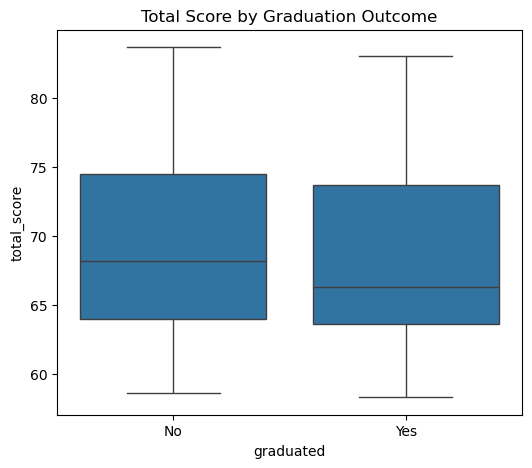

In [17]:
#Boxplot: Scores vs Graduation
plt.figure(figsize=(6,5))
sns.boxplot(x="graduated", y="total_score", data=cleaned_df)
plt.title("Total Score by Graduation Outcome")
plt.show()

#### Key Observations
Graduated - Yes: This group has a slightly wider range of scores, but the median score is slightly lower than the non-graduated group, at around 68. The IQR for this group is also broad, from roughly 64 to 74.

Graduated - No: This group has a slightly higher median score, at around 69. The scores are more tightly clustered than the graduated group, with the IQR spanning from about 65 to 73.

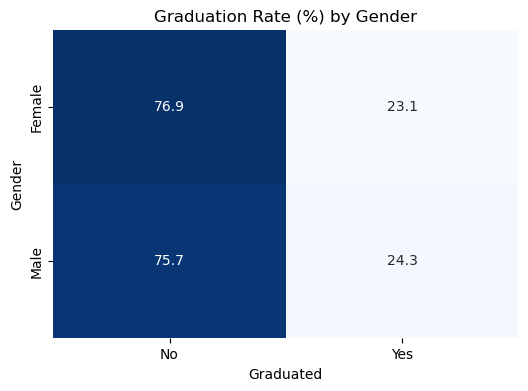

In [18]:
#Gender vs Graduated
ct_gender_grad = pd.crosstab(cleaned_df["gender"], cleaned_df["graduated"], normalize="index") * 100
plt.figure(figsize=(6,4))
sns.heatmap(ct_gender_grad, annot=True, fmt=".1f", cmap="Blues", cbar=False)
plt.title("Graduation Rate (%) by Gender")
plt.ylabel("Gender")
plt.xlabel("Graduated")
plt.show()

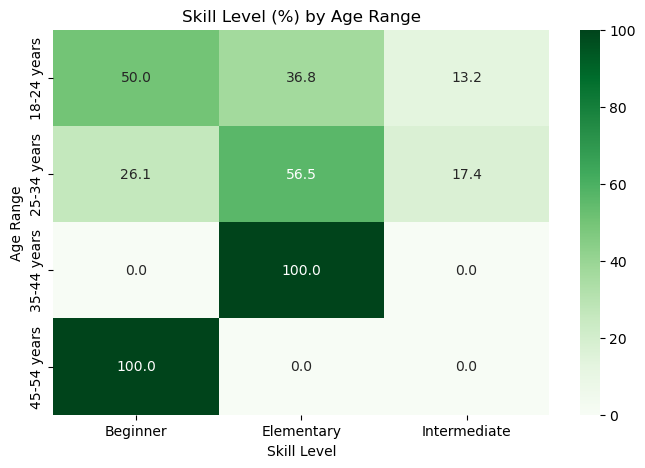

In [19]:
# Age range vs Skill level
ct_age_skill = pd.crosstab(cleaned_df["age_range"], cleaned_df["skill_level"], normalize="index") * 100
plt.figure(figsize=(8,5))
sns.heatmap(ct_age_skill, annot=True, fmt=".1f", cmap="Greens", cbar=True)
plt.title("Skill Level (%) by Age Range")
plt.ylabel("Age Range")
plt.xlabel("Skill Level")
plt.show()

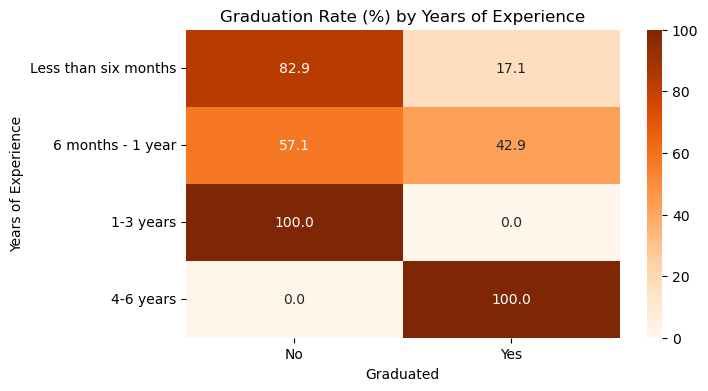

In [20]:
#Years of experience vs Graduated
ct_exp_grad = pd.crosstab(cleaned_df["years_experience"], cleaned_df["graduated"], normalize="index") * 100
plt.figure(figsize=(7,4))
sns.heatmap(ct_exp_grad, annot=True, fmt=".1f", cmap="Oranges", cbar=True)
plt.title("Graduation Rate (%) by Years of Experience")
plt.ylabel("Years of Experience")
plt.xlabel("Graduated")
plt.show()

## d. Multivariate Analysis

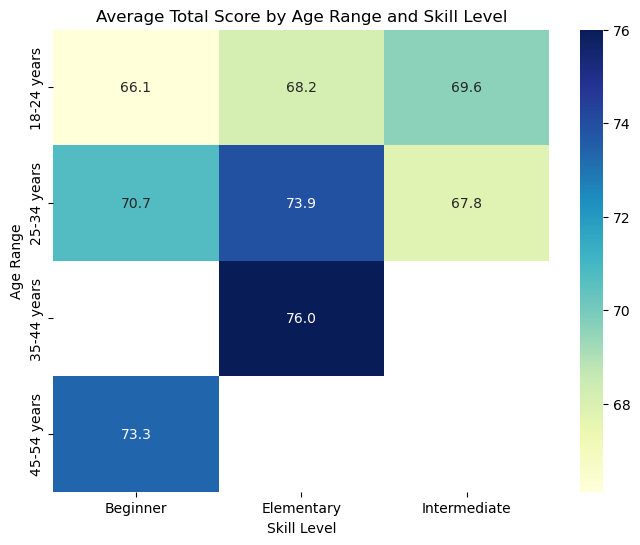

In [21]:
# Grouping and aggregating
grouped_scores = cleaned_df.groupby(["age_range", "skill_level"], observed=False)["total_score"].mean().unstack()

# Heatmap of average total_score
plt.figure(figsize=(8,6))
sns.heatmap(grouped_scores, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Total Score by Age Range and Skill Level")
plt.ylabel("Age Range")
plt.xlabel("Skill Level")
plt.show()

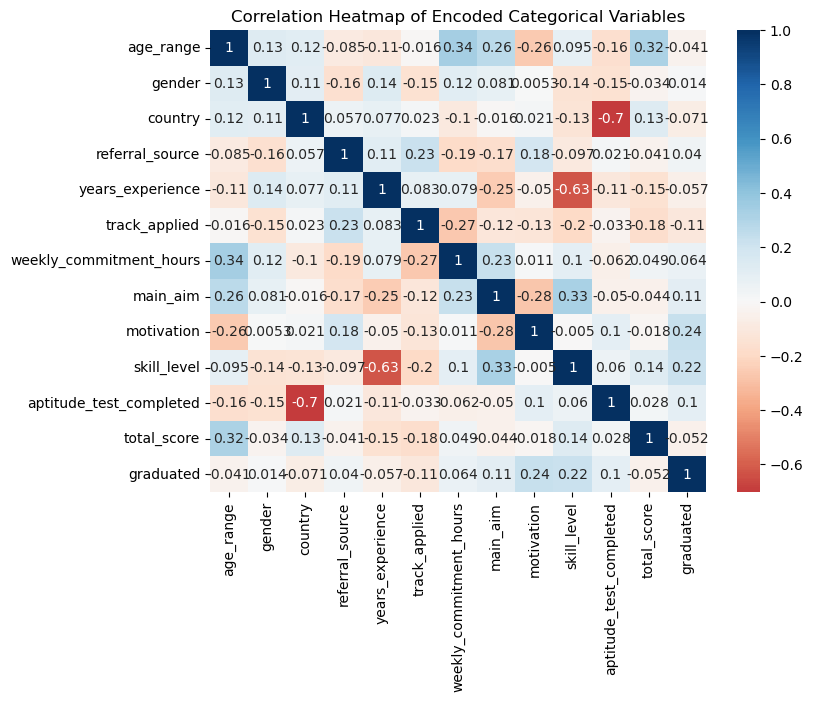

In [22]:
#Import LableEncoder to encode categorical data
from sklearn.preprocessing import LabelEncoder

# Categorical columns
columns = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_remove = ['timestamp', 'id_number']

#List of columns
cat_cols = [col for col in columns if col not in columns_to_remove]

# Encode categorical variables
encoded_df = cleaned_df.drop(columns=columns_to_remove)
for col in cat_cols:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(encoded_df.corr(), annot=True, cmap="RdBu", center=0)
plt.title("Correlation Heatmap of Encoded Categorical Variables")
plt.show()

#### Key Observations

1. Country vs Aptitude Test Completed  (-0.70) - Strong negative correlation.

    Suggests that aptitude test completion rates vary significantly by country (South Africa had a lower participation only one entry).

2. Skill Level vs Years of Experience (0.63) - Strong positive correlation.

    Makes sense: people with more years of experience tend to report higher skill levels.

3. Age Range vs Years of Experience (0.34) - Moderate positive correlation.

    Older participants generally have more years of experience (expected).

4. Skill Level vs Weekly Commitment Hours (0.33) - Moderate positive correlation.

    Those reporting higher skill levels are also committing more hours per week.

5. Skill Level vs Graduated (0.22) - Weak-to-moderate positive correlation.

    Higher skill levels are somewhat associated with higher graduation rates.

6. Track Applied vs Referral Source (0.23) - Weak positive correlation.

    Certain tracks may be more popular depending on referral channels.

7. Other correlations (close to 0)

    Gender, main aim, and total score have weak correlations with most variables.

    Suggests they are more independent.

#### A better test for indepence in categorical varibles is the Chi-square test

Null Hypothesis: Categorical columns are independent.
Alternative Hypothesis: Categorical columns are not independent.

I chose an alpha of 0.05

In [23]:
#Import chi2_contingency to test for independence
from scipy.stats import chi2_contingency

# Categorical columns
columns = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_remove = ['timestamp', 'id_number',  'motivation']

#List of columns
cat_cols = [col for col in columns if col not in columns_to_remove]

#Loop through each of the categorical column
results = []
alpha = 0.05
for i in range(len(cat_cols)):
    
    for j in range(i+1, len(cat_cols)):
        
        table = pd.crosstab(cleaned_df[cat_cols[i]], cleaned_df[cat_cols[j]])
        chi2, p, dof, _ = chi2_contingency(table)
        
        # Keep only significant associations
        if p < alpha:
            results.append((cat_cols[i], cat_cols[j], chi2, p))
        
#Convert to dataFrame
chi_results = pd.DataFrame(results, columns=["Var1", "Var2", "Chi2", "p_value"])

# Sort by strongest significance
chi_results.sort_values("p_value", inplace=True)
chi_results.reset_index(drop=True, inplace=True)
chi_results

,Var1,Var2,Chi2,p_value
0,years_experience,skill_level,33.316638,0.000009
1,years_experience,graduated,12.100610,0.007046
2,country,aptitude_test_completed,7.248248,0.007097
3,weekly_commitment_hours,skill_level,11.394433,0.022471
4,years_experience,weekly_commitment_hours,14.385094,0.025618
5,age_range,referral_source,26.614703,0.032037
6,referral_source,skill_level,19.097375,0.039043
7,country,main_aim,8.129032,0.043419
8,main_aim,skill_level,12.697734,0.048095


#### Key observations

Some of the categorical variables are dependent on one another as there’s a statistically significant association between them.

Years of experience is the most influential factor, strongly tied to skill level, graduation outcomes, and time commitment.

Skill level is central: it’s linked to experience, time commitment, referral source, and main aim.

Country and age also matter, influencing test completion and motivations.

## e. Graduation Insights

#### 1. Overall Graduation rate

Overall Graduation Rate:
graduated
No     76.190476
Yes    23.809524
Name: proportion, dtype: float64


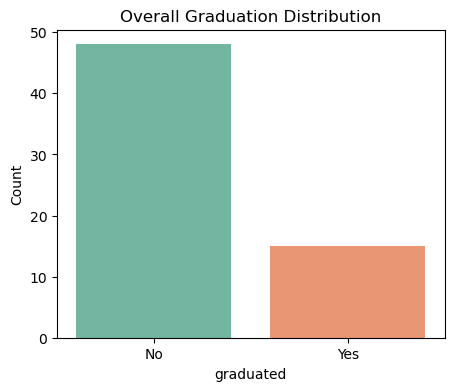

In [24]:
# Overall graduation rate
print("Overall Graduation Rate:")
print(cleaned_df["graduated"].value_counts(normalize=True) * 100)

# Plot overall graduation distribution
plt.figure(figsize=(5,4))
sns.countplot(data=cleaned_df, x="graduated", palette="Set2", hue=col, legend=False)
plt.title("Overall Graduation Distribution")
plt.ylabel("Count")
plt.show()

#### Key observations
Only about 1 in 4 participants successfully graduate.

What that suggests

High attrition: The majority of learners (76%) do not complete, which signals a challenge in sustaining engagement.

Barrier to completion: Something between enrollment and graduation filters out most participants.

Risks

If the goal is broad skill development, a 24% graduation rate may limit program impact.

It may also reflect entry requirements too low (many join, but aren’t ready), or support structures too weak (many drop off).

#### 2. Graduation rate by categories


Graduation rate by age_range:
graduated            No        Yes
age_range                         
18-24 years   76.315789  23.684211
25-34 years   73.913043  26.086957
35-44 years  100.000000   0.000000
45-54 years  100.000000   0.000000


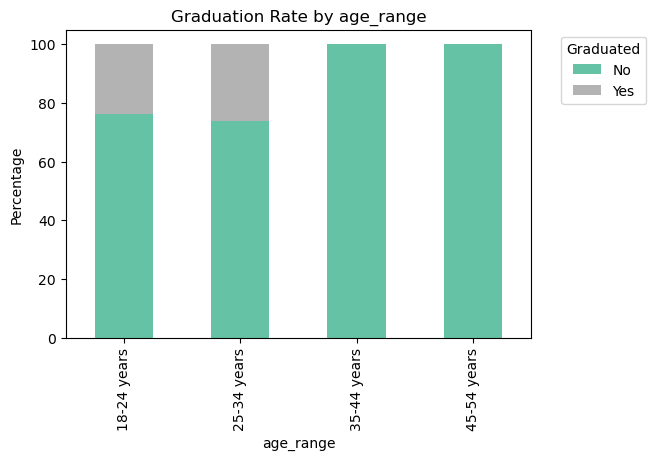


Graduation rate by gender:
graduated         No        Yes
gender                         
Female     76.923077  23.076923
Male       75.675676  24.324324


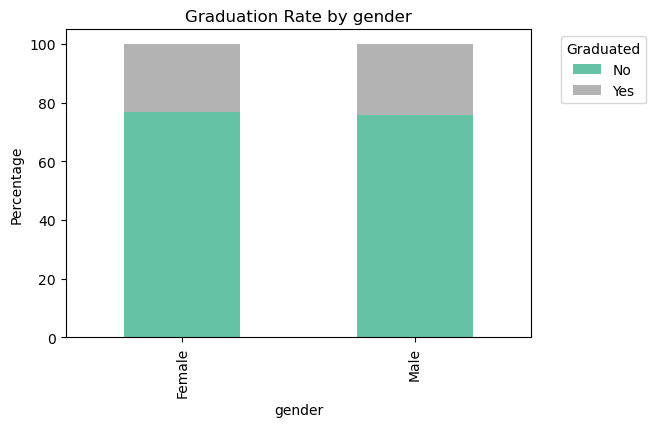


Graduation rate by country:
graduated             No        Yes
country                            
Kenya          75.806452  24.193548
South Africa  100.000000   0.000000


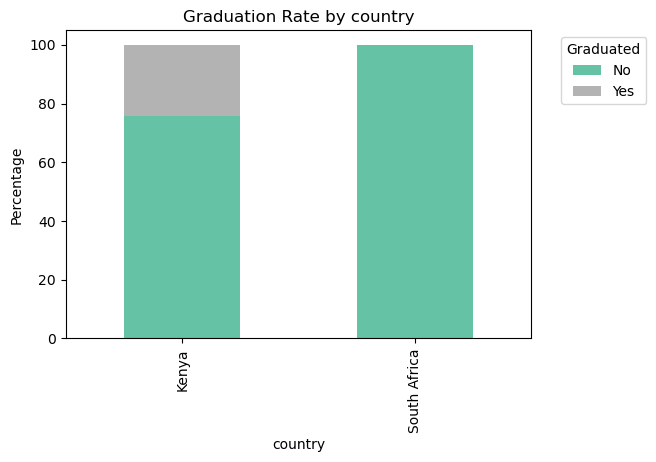


Graduation rate by referral_source:
graduated                                  No         Yes
referral_source                                          
Instagram                          100.000000    0.000000
LinkedIn                            71.428571   28.571429
Twitter                             71.428571   28.571429
WhatsApp                            80.555556   19.444444
Word of mouth                       75.000000   25.000000
through a geeks for geeks webinar    0.000000  100.000000


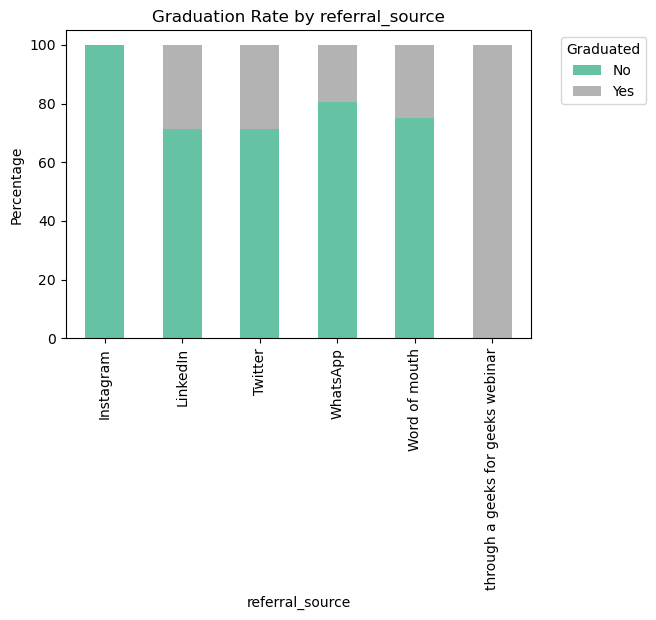


Graduation rate by years_experience:
graduated                     No         Yes
years_experience                            
Less than six months   82.926829   17.073171
6 months - 1 year      57.142857   42.857143
1-3 years             100.000000    0.000000
4-6 years               0.000000  100.000000


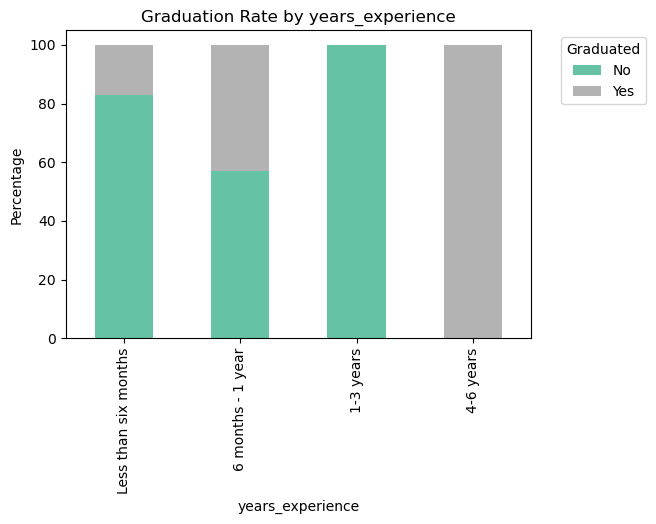


Graduation rate by track_applied:
graduated            No       Yes
track_applied                    
Data analysis  50.00000  50.00000
Data science   77.04918  22.95082


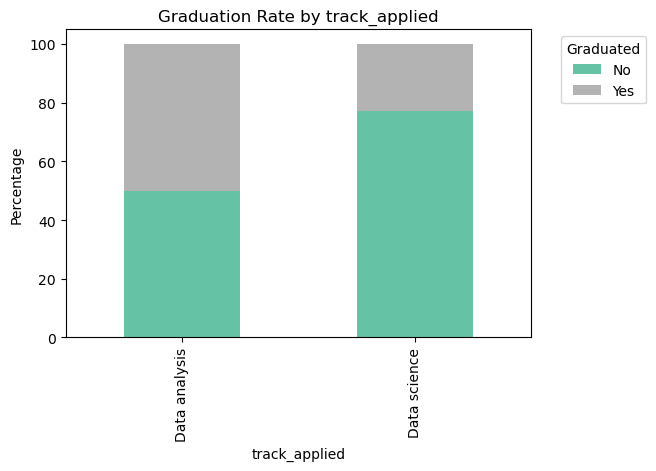


Graduation rate by weekly_commitment_hours:
graduated                       No        Yes
weekly_commitment_hours                      
less than 6 hours        75.000000  25.000000
7-14 hours               78.378378  21.621622
more than 14 hours       72.222222  27.777778


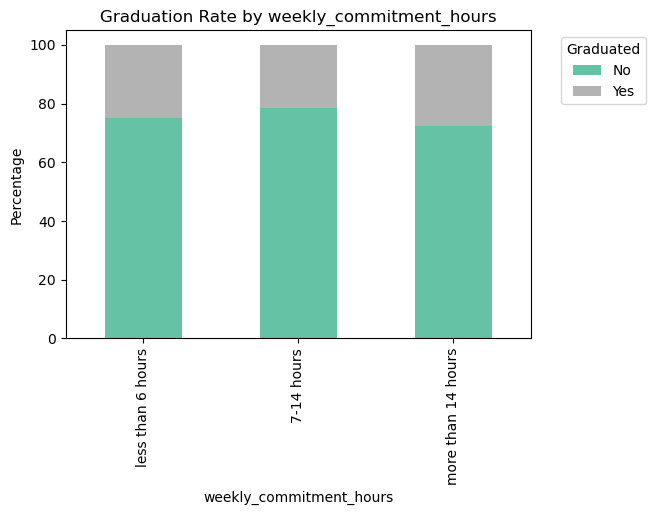


Graduation rate by main_aim:
graduated            No        Yes
main_aim                          
Learn afresh  85.714286  14.285714
Networking    50.000000  50.000000
Portfolio     85.714286  14.285714
Upskill       72.500000  27.500000


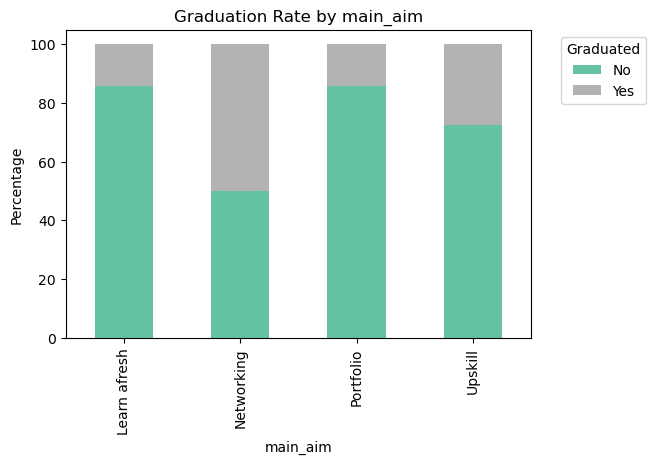


Graduation rate by skill_level:
graduated            No        Yes
skill_level                       
Beginner      84.615385  15.384615
Elementary    75.000000  25.000000
Intermediate  55.555556  44.444444


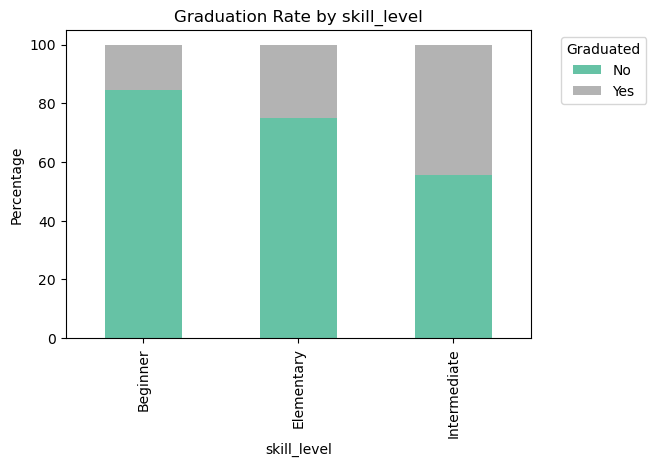


Graduation rate by aptitude_test_completed:
graduated                        No        Yes
aptitude_test_completed                       
No                       100.000000   0.000000
Yes                       75.409836  24.590164


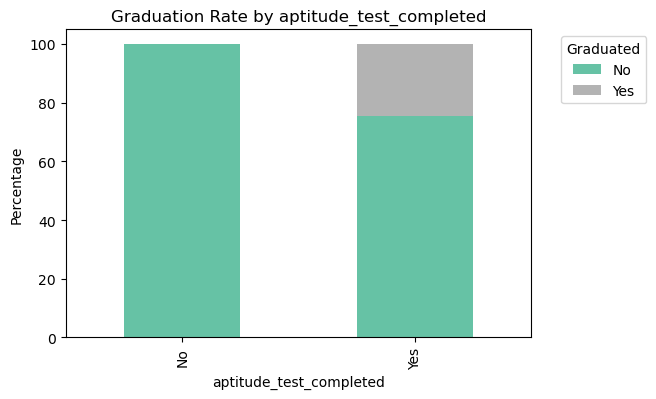

In [25]:
# Graduation rate by categories
# Categorical columns
columns = cleaned_df.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_remove = ['timestamp', 'id_number',  'motivation', 'graduated']

#List of columns
cat_cols = [col for col in columns if col not in columns_to_remove]

#Loop thorugh the columns
for col in cat_cols:
    print(f"\nGraduation rate by {col}:")
    grad_rate = pd.crosstab(cleaned_df[col], cleaned_df["graduated"], normalize="index") * 100
    print(grad_rate)
    
    # Plot stacked bar chart
    grad_rate.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Set2")
    plt.title(f"Graduation Rate by {col}")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.legend(title="Graduated", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

#### Key Observations

1. Graduation rate by skill_level
    Beginners: only 15% graduated.
    Elementary: 25% graduated. 
    Intermediate: nearly 45% graduated.

2. Graduation rate by main_aim
    Networking seekers: 50% graduation rate - the highest. 
    Upskillers: about 28%.
    Learn afresh / Portfolio: both low ≈14%.

3. Graduation rate by weekly_commitment_hours
    <6 hrs: 25% graduated.
    7–14 hrs: ~22%.
    14 hrs: ~28%.

#### 3. Relationship between total_score and graduation

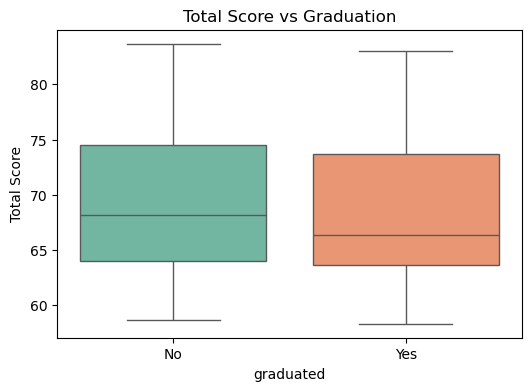

In [26]:
# Relationship between total_score and graduation
plt.figure(figsize=(6,4))
sns.boxplot(data=cleaned_df, x="graduated", y="total_score", palette="Set2", hue='graduated', legend=False)
plt.title("Total Score vs Graduation")
plt.ylabel("Total Score")
plt.show()

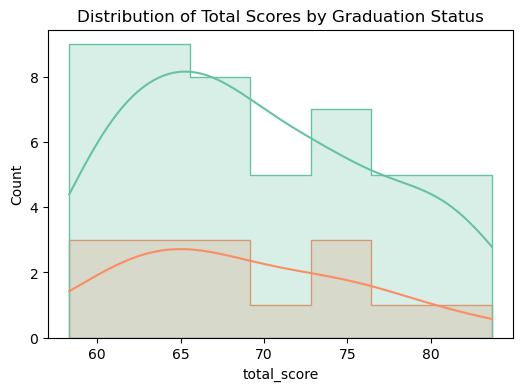

In [27]:
# Distribution of total score in relation to graduation status
plt.figure(figsize=(6,4))
sns.histplot(data=cleaned_df, x="total_score", hue="graduated", kde=True, palette="Set2", element="step", legend=False)
plt.title("Distribution of Total Scores by Graduation Status")
plt.show()

#### Key Observations
100% of those who skipped the test failed to graduate.

Those who completed it had a non-trivial chance (≈25%) of graduating.

## f. Conclusion

1. Participant Demographics & Profiles

    Age distribution skewed toward younger participants, mainly 18–24 years.
    
    Experience levels varied, but most were beginners or elementary learners with limited prior exposure.
    
    Weekly commitment clustered in the 7–14 hour range.
    
    Gender balance and referral sources showed diversity but no strong dominance by a single category.

2. Categorical Distributions

    Clear patterns emerged when visualizing counts: most learners start from beginner/elementary levels, reflecting the program’s accessibility.
    
    Some referral sources (like friends or social media) were more common than others, shaping how learners discover the program.

3. Relationships Between Categories (Chi-square analysis)

    Significant associations were found between:
    
    Years of experience vs skill level (expected: more experience, higher skill).
    
    Years of experience vs graduation status (experience helped completion).
    
    Commitment hours vs skill level (greater commitment aligned with higher skill).
    
    Age range vs referral source (younger learners heard of the program differently).
    
    Main aim vs skill level (different motivations aligned with different competencies).
    
    These results indicate learning context, prior experience, and motivation interact strongly in shaping outcomes.

4. Numeric Patterns & Correlations

    Total score was positively associated with graduation. Higher-scoring participants had much greater odds of completing.
    
    Heatmaps showed that encoding categorical features into numeric form revealed clusters where skill level and experience aligned with higher mean scores.


5. Graduation Insights

    Overall graduation rate: relatively low, underscoring the challenge of program completion.
    
    Aptitude test: decisive factor. Skipping it = 0% graduation; attempting it raised success to ~25%.
    
    Skill level: Beginners (15%) and elementary (25%) graduated far less than intermediates (44%).
    
    Main aim: Networking was the strongest motivator (50% graduated), compared with learning afresh or portfolio building (~14%).
    
    Weekly commitment: Those spending more than 14 hours had the highest graduation (28%), showing time investment matters.

6. Key Takeaways

    Baseline readiness (experience + skill) and program engagement (aptitude test + time commitment) are the strongest drivers of graduation.
    
    Motivation type matters: those seeking community (networking) sustain effort better than those driven by individual goals.
    
    Risk groups: beginners, portfolio learners, and those with low commitment hours face the greatest risk of non-completion.